In [149]:
import os
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis.analysis import msd
import matplotlib.pyplot as plt

In [145]:
TEMPS = [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]
MAP_TEMPS =  {1:50000, 1.5: 10000, 0.9:150000, 0.8:150000, 
              0.7:180000, 0.6:1000000, 0.65:350000, 0.55:3000000, 
              0.5:10000000, 0.475:30000000}
BOX = 6.6943295

def load_traj(temp):
    lamp_path = "./Data/equil/kalj_T{}_n360_v300_{}_1.lammpstrj".format(temp, MAP_TEMPS[temp])
    dcd_path = "./Data/prod/kalj_T{}_n360_v300_prod_{}_1.unwrap.dcd".format(temp, MAP_TEMPS[temp])
    u = mda.Universe(lamp_path, dcd_path, topology_format="LAMMPSDUMP")
    return u

def compute_rdf(temp, a, b):
    u = load_traj(temp)
    rdf_calc = InterRDF(u.select_atoms("type {}".format(a)), u.select_atoms("type {}".format(b)), nbins=100, range=(0.00001, BOX/2))
    rdf_calc.run()
    return rdf_calc.results.bins, rdf_calc.results.rdf

In [146]:
def plot_rdfs(a = 1, b = 2):
    for temp in TEMPS:
        bins, rdf = compute_rdf(temp, a, b)
        plt.plot(bins, rdf, label=str(temp))
    plt.xlabel("Distance (A)")
    plt.ylabel("g(r) (a.u.)")
    plt.title("Radial Distribution between Particle types {} and {}".format(a, b))
    plt.legend()
    plt.savefig("./Figures/rdf_plot_{}_{}.png".format(a, b))
    plt.show()

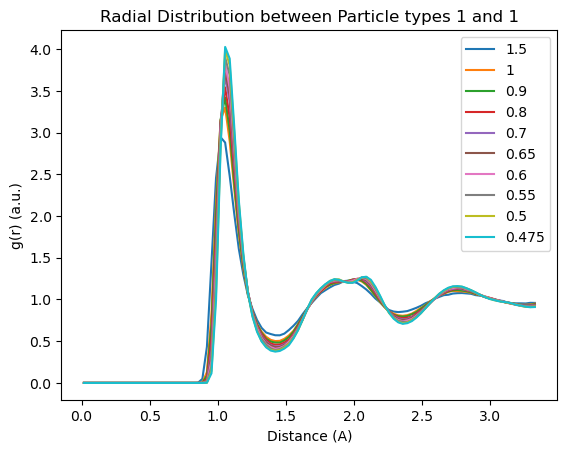

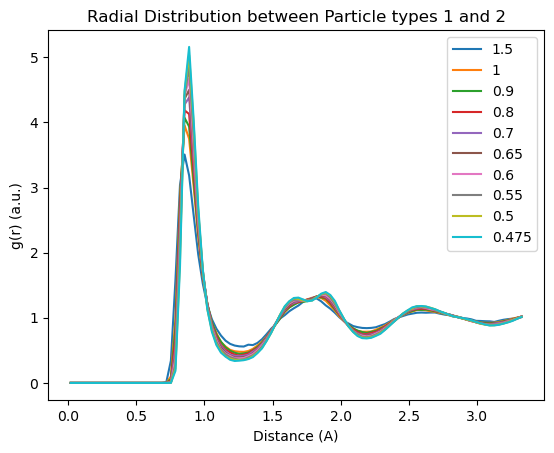

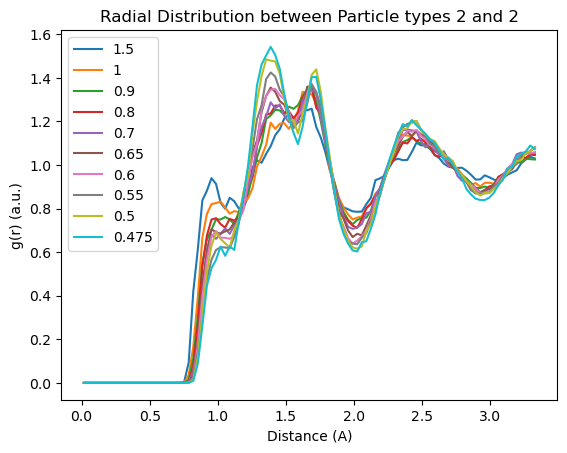

In [147]:
plot_rdfs(1, 1)
plot_rdfs(1, 2)
plot_rdfs(2, 2)

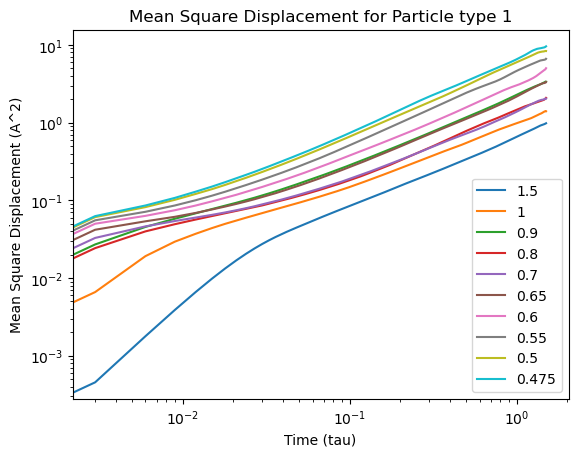

In [180]:
def plot_msd(a = 1):
    timestep = 0.003
    for temp in TEMPS:
        u = load_traj(temp)
        msd_a = msd.EinsteinMSD(u.select_atoms("type {}".format(a)))
        msd_a.run()
        nframes = msd_a.n_frames
        lagtimes = np.arange(nframes)*timestep
        plt.plot(lagtimes, msd_a.results.timeseries, label=str(temp))
    plt.xlabel("Time (tau)")
    plt.ylabel("Mean Square Displacement (A^2)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Mean Square Displacement for Particle type {}".format(a))
    plt.legend()
    plt.savefig("./Figures/msd_plot_{}.png".format(a))
    plt.show()

plot_msd(1)

1.5
1
0.9
0.8
0.7
0.65
0.6
0.55
0.5
0.475


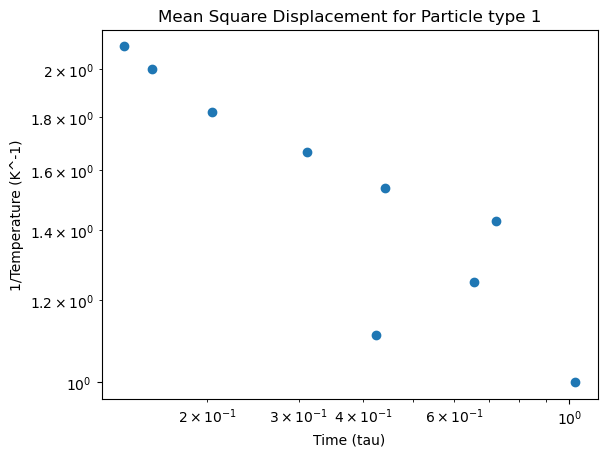

In [179]:
def plot_msd_equal_1(a = 1):
    time_step = 0.003
    time_results = []
    temp_results = []
    for temp in TEMPS:
        u = load_traj(temp)
        print(temp)
        msd_a = msd.EinsteinMSD(u.select_atoms("type {}".format(a)))
        msd_a.run()
        if len(np.where(msd_a.results.timeseries >= 1)[0]) != 0:
            index_results = np.where(msd_a.results.timeseries >= 1)[0][0]
            time_results.append(time_step * index_results)
            temp_results.append(1/temp)
    plt.scatter(time_results, temp_results)
    plt.annotate(txt, (x[i], y[i]))
    plt.xlabel("Time (tau)")
    plt.ylabel("1/Temperature (K^-1)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Mean Square Displacement for Particle type {}".format(a))
    plt.savefig("./Figures/time_msd_1_plot_{}.png".format(a))
    plt.show()

plot_msd_equal_1(1)